# Scan The Code RobotX Task
Task Description

### Libraries Used

In [1]:
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg

#This allows plots in the notebook
%matplotlib inline

### Plotting Code
This notebook contains several images which will be plotted, to keep each cell as simple as possible these functions will be used to reduce redundant plotting code

In [2]:
#Regular Plotting of multiple images
def plot_multiple(image_list):
    col = len(image_list)
    row = 1
        
    fig, ax = plt.subplots(row,col, figsize=(16,8))
    for i in range(len(ax)):
        ax[i].axis('off')
        ax[i].imshow(images[i])
        
    plt.show()
    
#Plotting images which color recognition is applied to
def plot_color_recognition(image_list, x, y, radius):
    col = len(image_list)
    row = 1
        
    fig, ax = plt.subplots(row,col, figsize=(16,8))
    for i in range(len(ax)):
        ax[i].axis('off')
        ax[i].imshow(images[i])
        if i == 2:
            ax[i].axis('on')
            circ = Circle((x,y),radius, fill = False, linewidth = 4, color = 'r')
            ax[i].add_patch(circ)
        
    plt.show()
    
def plot_color_recognition_multiple(image, coordinates, radius):
    col = 2
    row = 1
        
    fig, ax = plt.subplots(row,col, figsize=(16,8))
    for i in range(len(ax)):
        ax[i].axis('off')
        ax[i].imshow(image)
        if i == 1:
            ax[i].axis('on')
            print(coordinates)
            for key, value in coordinates.items():
                x = value[0]
                y = value[1]
                circ = Circle((x,y),radius[key], fill = False, linewidth = 4, color=key)
                plt.text(x,y-radius[key]-20, key, horizontalalignment='center', fontsize = 18)
                ax[i].add_patch(circ)
        
    plt.show()

### The Light Buoy
description

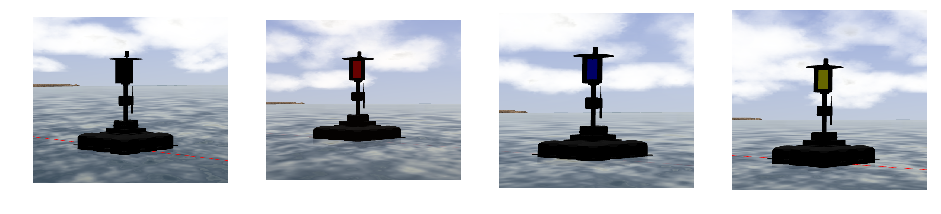

In [3]:
# red_buoy = cv2.imread('images/Red_rgb.png')
black_buoy = mpimg.imread('images/black_rgb.png')
red_buoy = mpimg.imread('images/Red_rgb.png')
blue_buoy = mpimg.imread('images/Blue_rgb.png')
yellow_buoy = mpimg.imread('images/Yellow_rgb.png')

images = [black_buoy, red_buoy, blue_buoy, yellow_buoy]
plot_multiple(images)

### Color Filtering using RGB

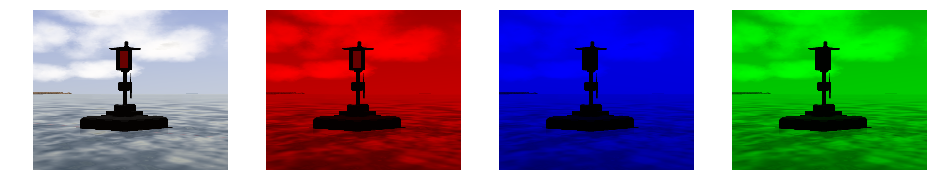

In [4]:
I_red = red_buoy.copy()  # Duplicate image
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0    # Zero out contribution from blue

I_green = red_buoy.copy()  # Duplicate image
I_green[:, :, 0] = 0    # Zero out contribution from red
I_green[:, :, 2] = 0    # Zero out contribution from blue

I_blue = red_buoy.copy()  # Duplicate image
I_blue[:, :, 1] = 0    # Zero out contribution from green
I_blue[:, :, 0] = 0    # Zero out contribution from red

images = [red_buoy, I_red, I_blue, I_green]
plot_multiple(images)

### Color Filtering using HSV

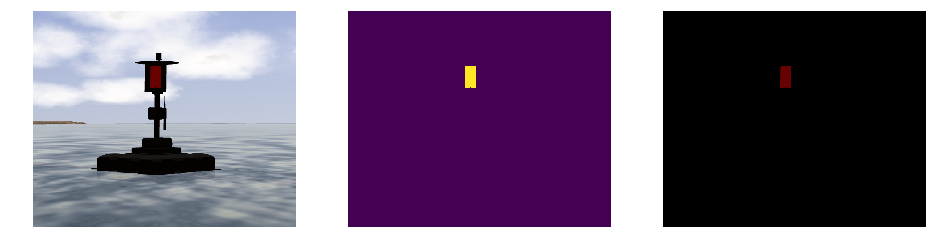

In [5]:
#Use opencv to load in images in HSV format
red_buoy = cv2.imread('images/Red_rgb.png')
red_buoy_hsv = cv2.cvtColor(red_buoy, cv2.COLOR_BGR2HSV)

lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])

mask = cv2.inRange(red_buoy_hsv, lower_red, upper_red)
res = cv2.bitwise_and(red_buoy_hsv, red_buoy_hsv, mask = mask)

#Convert the images from HSV back to RGB to be plotted
red_buoy_plot = cv2.cvtColor(red_buoy, cv2.COLOR_BGR2RGB)
res_plot = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)

images = [red_buoy_plot, mask, res_plot]
plot_multiple(images)

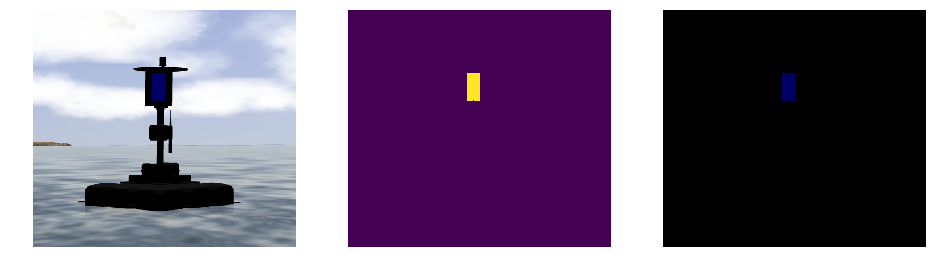

In [6]:
blue_buoy = cv2.imread('images/Blue_rgb.png')
blue_buoy_hsv = cv2.cvtColor(blue_buoy, cv2.COLOR_BGR2HSV)

lower_blue = np.array([115,50,50])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(blue_buoy_hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(blue_buoy_hsv, blue_buoy_hsv, mask = mask)

#Convert the images from HSV back to RGB to be plotted
blue_buoy_plot = cv2.cvtColor(blue_buoy, cv2.COLOR_BGR2RGB)
res_plot = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)

images = [blue_buoy_plot, mask, res_plot]
plot_multiple(images)

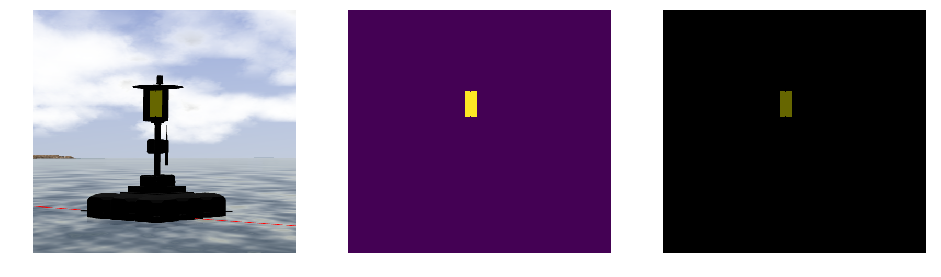

In [7]:
yellow_buoy = cv2.imread('images/Yellow_rgb.png')
yellow_buoy_hsv = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20,100,100])
upper_yellow = np.array([30,255,255])

mask = cv2.inRange(yellow_buoy_hsv, lower_yellow, upper_yellow)
res = cv2.bitwise_and(yellow_buoy_hsv, yellow_buoy_hsv, mask = mask)

#Convert the images from HSV back to RGB to be plotted
yellow_buoy_plot = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2RGB)
res_plot = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)

images = [yellow_buoy_plot, mask, res_plot]
plot_multiple(images)

### Obtaining the Spatial Information of Identified Object

Coordinates:  234.5 179.0
26.6130657196


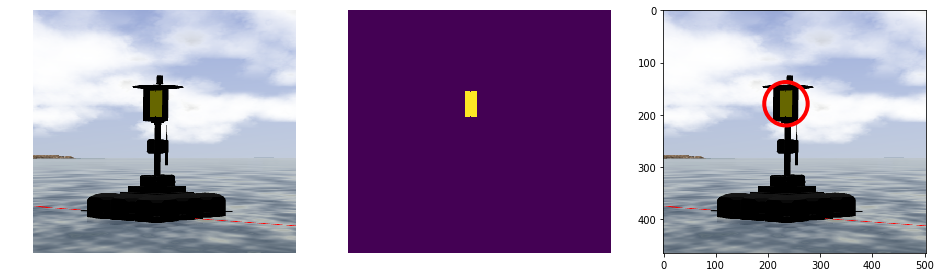

In [8]:
yellow_buoy = cv2.imread('images/Yellow_rgb.png')
yellow_buoy_hsv = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20,100,100])
upper_yellow = np.array([30,255,255])

mask = cv2.inRange(yellow_buoy_hsv, lower_yellow, upper_yellow)
res = cv2.bitwise_and(yellow_buoy_hsv, yellow_buoy_hsv, mask = mask)

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[-2]
if len(cnts) > 0:
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    c = max(cnts, key=cv2.contourArea)

    ((x, y), radius) = cv2.minEnclosingCircle(c)
    print 'Coordinates: ', x, y
    M = cv2.moments(c)
    print(radius)
    radius += 15

yellow_buoy = cv2.cvtColor(yellow_buoy, cv2.COLOR_BGR2RGB)
images = [yellow_buoy, mask, yellow_buoy]

plot_color_recognition(images, x, y, radius)

### Single Classifier for All Three Colors

In [9]:
def color_recognition(image):
    classified, coordinates, radius_dict = {}, {}, {}
    
    lower_threshold = {"red": lower_red,"blue": lower_blue, "yellow": lower_yellow}
    upper_threshold = {"red": upper_red,"blue": upper_blue, "yellow": upper_yellow}
    
    for color in lower_threshold.keys():
        lower_color = lower_threshold[color]
        upper_color = upper_threshold[color]
        mask = cv2.inRange(image, lower_color, upper_color)
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[-2]
        if len(cnts) > 0:
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            
            
            if radius > 15:
                radius += 15
                classified[color] = True
                coordinates[color] = [x, y]
                radius_dict[color] = radius
            else: 
                classified[color] = False
        else: 
            classified[color] = False
        
    return classified, coordinates, radius_dict


('Classified: ', {'blue': False, 'red': True, 'yellow': True})
('Coordinates: ', {'red': [442.5, 408.5], 'yellow': [234.5, 179.0]})
('Radius: ', {'red': 74.67002487182617, 'yellow': 41.61306571960449})
{'red': [442.5, 408.5], 'yellow': [234.5, 179.0]}


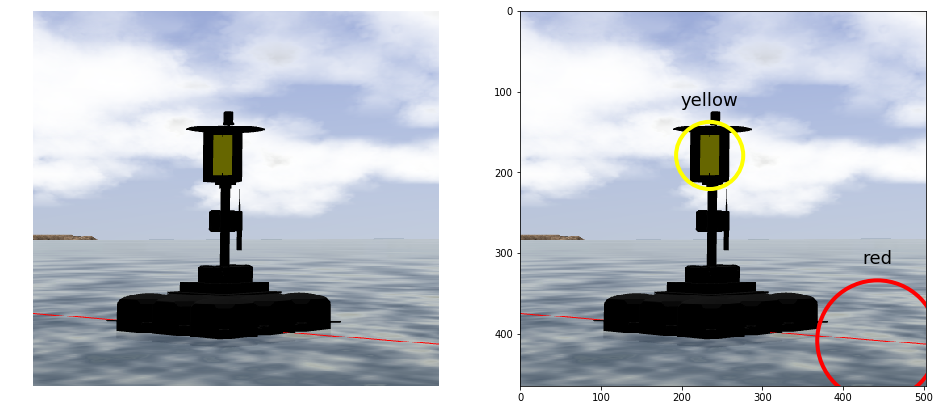

In [10]:
classified, coordinates, radius = color_recognition(yellow_buoy_hsv)
print("Classified: ", classified)
print("Coordinates: ", coordinates)
print("Radius: ", radius)

plot_color_recognition_multiple(yellow_buoy, coordinates, radius)

{'red': [273.5, 149.0]}


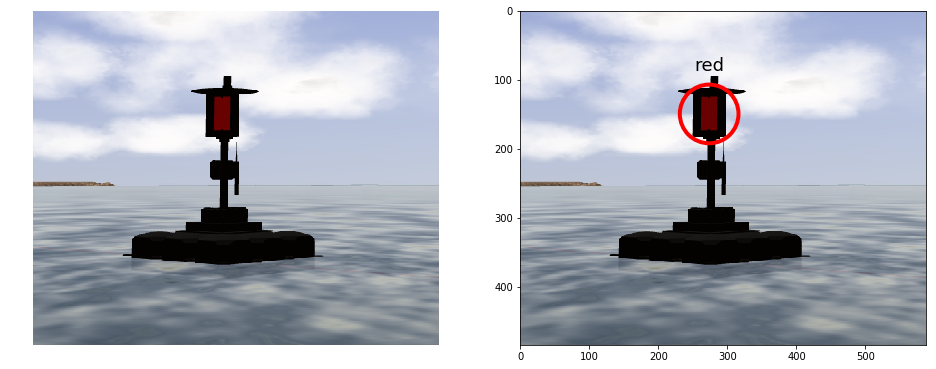

{'blue': [223.5, 137.0]}


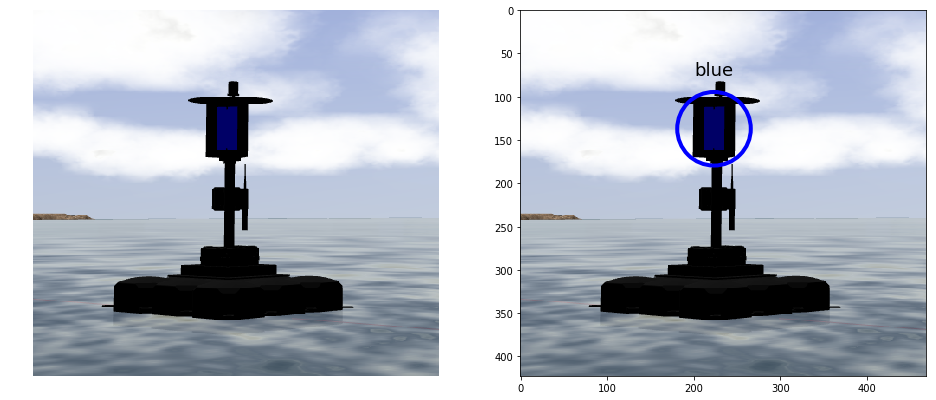

In [11]:
classified, coordinates, radius = color_recognition(red_buoy_hsv)
plot_color_recognition_multiple(red_buoy_plot, coordinates, radius)

classified, coordinates, radius = color_recognition(blue_buoy_hsv)
plot_color_recognition_multiple(blue_buoy_plot, coordinates, radius)

### Processing Colors Recognized over time
As the color recognition script identifies coolors, keep track of the colors identified (if only one color is identified) while also keeping track of their time stamp enables us to know the order the colors in the code are actually being presented. 

In [12]:
import numpy as np
def scan_the_code(colors, times):
    diff = np.asarray([])
    colors = np.asarray(colors)
    times = np.asarray(times)
    for i in range(len(times)):
        if i == 0:
            diff = np.append(diff, 0)
        else:
            diff = np.append(diff, times[i] - times[i-1])

    diff_max = np.argmax(diff) #Returns position of highest value
#     print(diff_max)
#     print(diff)
    if len(colors)-3 < diff_max: #If at end of the list, count backwards to find code. 
        scan = [colors[diff_max], colors[diff_max-1], color[diff_max-2]]
    else:
        scan = [colors[diff_max], colors[diff_max+1], colors[diff_max+2]]
        
    return scan

In [13]:
colors = ['red', 'blue', 'yellow','red', 'blue', 'yellow','red', 'blue']
# times =  [15234, 15235, 15237, 15238, 15239, 15242, 15243, 15244] #Will Produce Code: Yellow Red Blue
times =  [15235, 15237, 15238, 15239, 15242, 15243, 15244, 15247] #Will Produce Code: Blue Yellow Red

scanned = scan_the_code(colors, times)
# scan_the_code(colors, times)

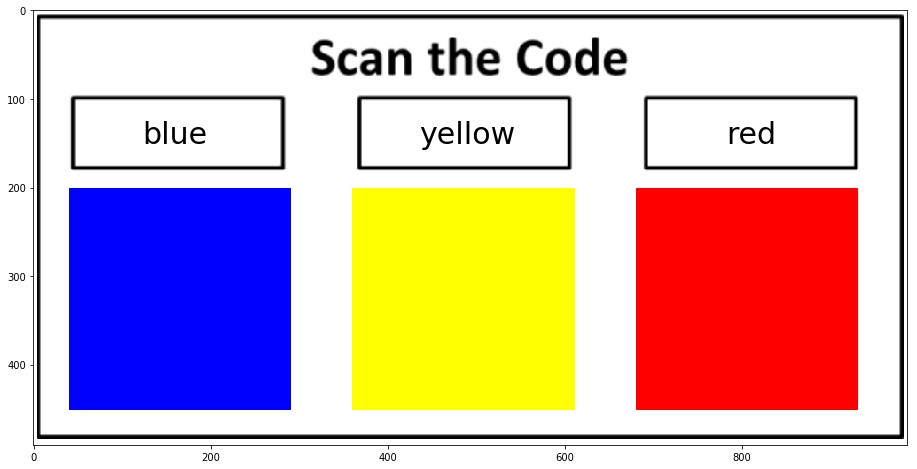

In [14]:
def plot_scan_the_code(scanned):
    img=mpimg.imread('images/scan_the_code_report_template.png')

    fig, ax = plt.subplots(1,1, figsize=(16,8))
    ax.axis('on')
    ax.imshow(img)

    a = Rectangle([40,200], 250, 250, color=scanned[0])
    b = Rectangle([360,200], 250, 250, color=scanned[1])
    c = Rectangle([680,200], 250, 250, color=scanned[2])

    plt.text(160, 140, scanned[0], horizontalalignment='center', verticalalignment='center', fontsize=30)
    plt.text(490, 140, scanned[1], horizontalalignment='center', verticalalignment='center', fontsize=30)
    plt.text(810, 140, scanned[2], horizontalalignment='center', verticalalignment='center', fontsize=30)

    ax.add_patch(a)
    ax.add_patch(b)
    ax.add_patch(c)

    plt.show()
    
plot_scan_the_code(scanned)

### Adjusting Threshold Values based off Actual WAMV Camera Images

In [122]:
lower_red = np.array([140,120,60])
upper_red = np.array([176,255,200])

lower_blue = np.array([107,170,60])
upper_blue = np.array([115,220,225])

lower_yellow = np.array([12,30,30])
upper_yellow = np.array([26,255,255])

lower_green = np.array([74,30,30])
upper_green = np.array([85,255,255])

lower_gray = np.array([108,60,60])
upper_gray = np.array([113,120,120])

def color_recognition(image):
    classified, coordinates, radius_dict = {}, {}, {}
    
    lower_threshold = {"red": lower_red,"blue": lower_blue, "yellow": lower_yellow, "green": lower_green, "gray": lower_gray}
    upper_threshold = {"red": upper_red,"blue": upper_blue, "yellow": upper_yellow, "green": upper_green, "gray": upper_gray}
    
    for color in lower_threshold.keys():
        lower_color = lower_threshold[color]
        upper_color = upper_threshold[color]
        mask = cv2.inRange(image, lower_color, upper_color)
        ###
#         if color == "blue":
#             fig, ax = plt.subplots(1,1, figsize=(16,8))
#             ax.axis('on')
#             ax.imshow(mask)

#             plt.show()
        ###
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[-2]
        if len(cnts) > 0:
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            
            
            if radius > 15:
                radius += 15
                classified[color] = True
                coordinates[color] = [x, y]
                radius_dict[color] = radius
            else: 
                classified[color] = False
        else: 
            classified[color] = False
        
    return classified, coordinates, radius_dict

def color_picker(image, x, y):
    return (image[y, x, 0], image[y, x, 1], image[y, x, 2])

{'gray': [430.9189147949219, 88.02702331542969], 'red': [305.0116271972656, 237.5]}


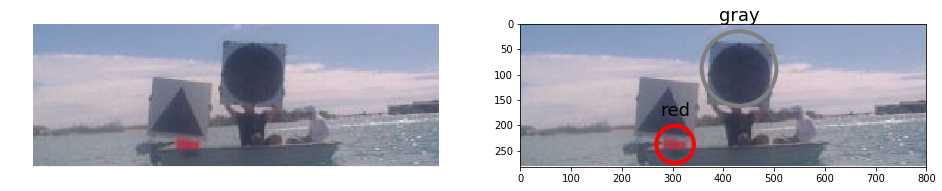

{'gray': [156.23675537109375, 126.37413787841797], 'red': [113.73149108886719, 211.4493865966797]}


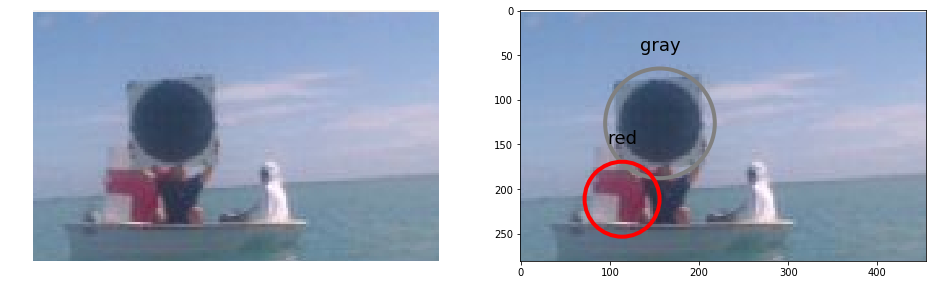

{'gray': [215.5, 179.5], 'red': [74.0, 258.0], 'yellow': [31.20689582824707, 191.0]}


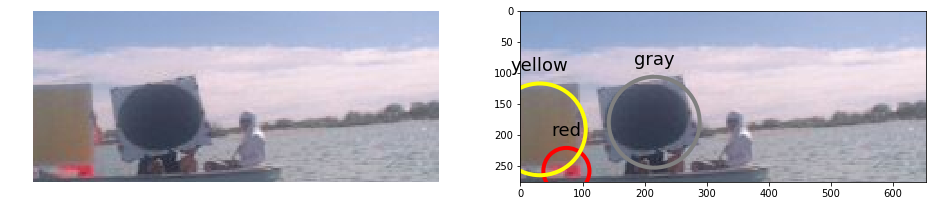

RGB Color:  (108, 114, 128)
{'yellow': [260.5303649902344, 147.63490295410156]}


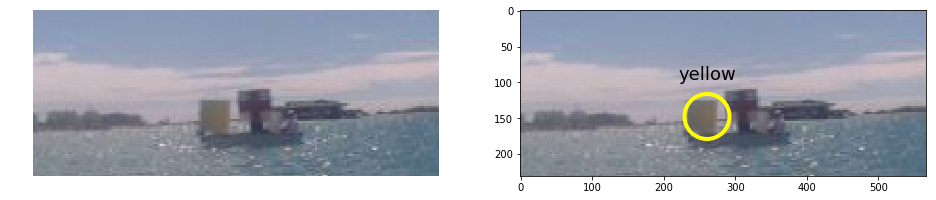

RGB Color:  (74, 61, 78)


In [123]:
image = cv2.imread('images/5.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

# print "RGB Color: ", color_picker(image_plot, 450, 200)

image = cv2.imread('images/6.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

image = cv2.imread('images/8.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

print "RGB Color: ", color_picker(image_plot, 140, 200)

image = cv2.imread('images/11.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

print "RGB Color: ", color_picker(image_plot, 305, 140)

{'blue': [375.0, 185.5]}


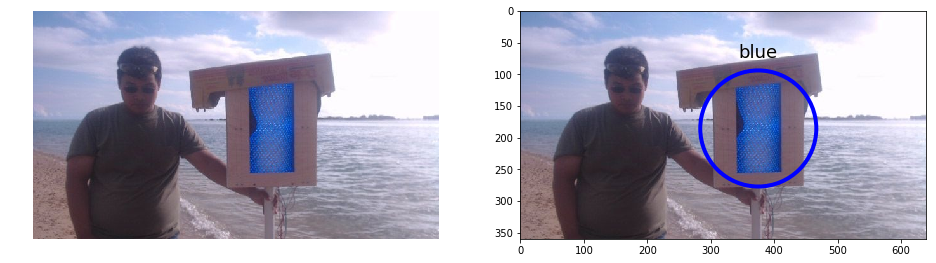

RGB Color:  (65, 89, 163)
{'blue': [125.0, 41.0]}


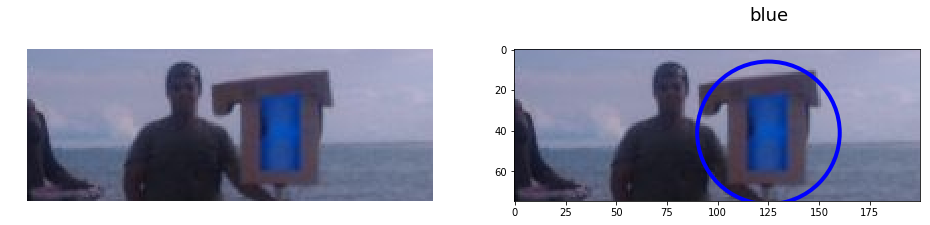

{'green': [510.0, 348.0], 'red': [28.0, 573.0]}


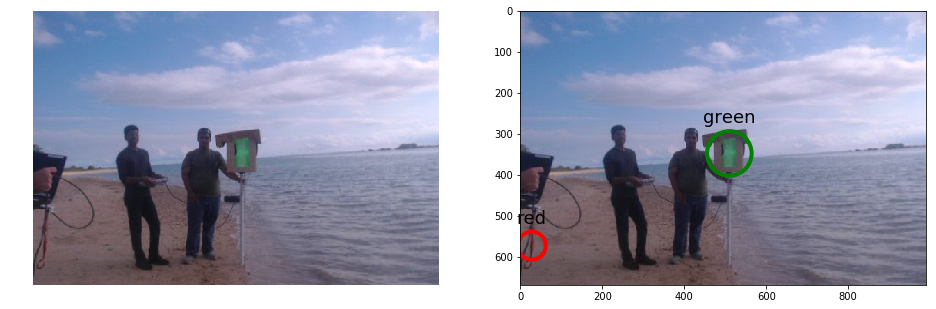

{'green': [395.0, 226.5], 'red': [38.0, 241.0]}


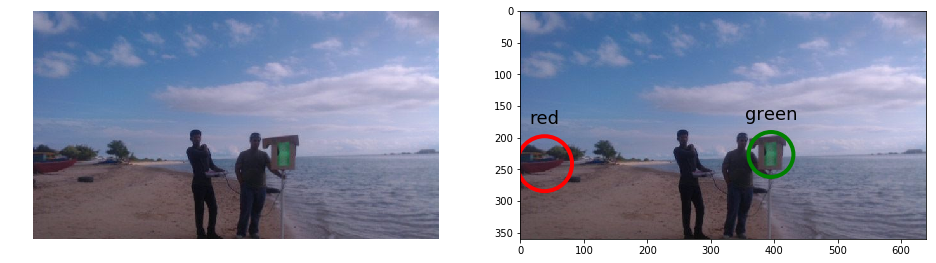

RGB Color:  (66, 124, 99)
{'gray': [171.5, 67.5], 'red': [368.5, 163.0]}


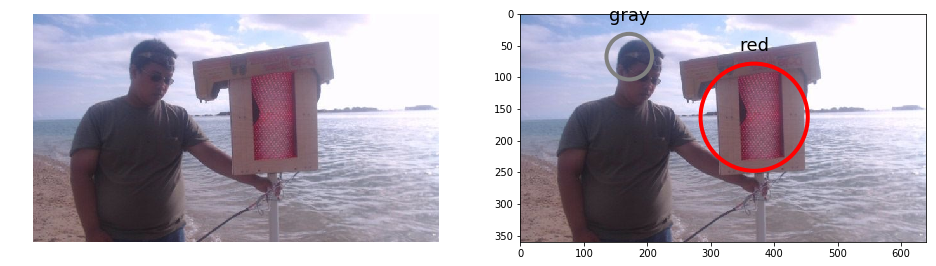

{'red': [368.9072265625, 209.0154571533203]}


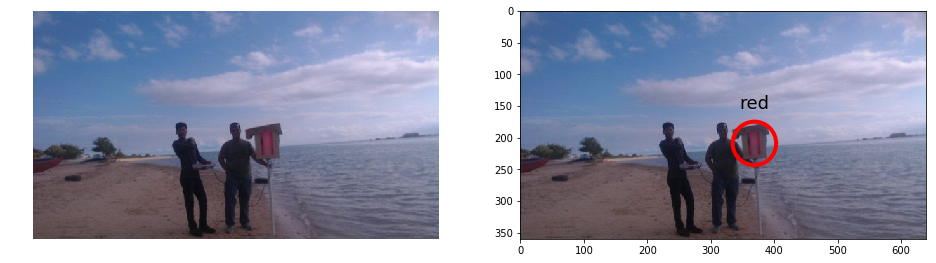

In [124]:
image = cv2.imread('images/blue.jpg')
# image = image[100:200, 50:600]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

print "RGB Color: ", color_picker(image_plot, 390, 225)

image = cv2.imread('images/blue2.jpg')
image = image[175:250, 300:500]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

# print "RGB Color: ", color_picker(image_plot, 425, 225)

image = cv2.imread('images/green.png')
# image = image[100:200, 50:600]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

# print "RGB Color: ", color_picker(image_plot, 450, 200)

image = cv2.imread('images/green2.jpg')
# image = image[100:200, 50:600]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

print "RGB Color: ", color_picker(image_plot, 390, 225)

image = cv2.imread('images/red.jpg')
# image = image[100:200, 50:600]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

# print "RGB Color: ", color_picker(image_plot, 450, 200)

image = cv2.imread('images/red2.jpg')
# image = image[100:200, 50:600]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
classified, coordinates, radius = color_recognition(image_hsv)
plot_color_recognition_multiple(image_plot, coordinates, radius)

# print "RGB Color: ", color_picker(image_plot, 425, 225)